In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os 
import glob as gb 
import cv2 
import tensorflow as tf 
import keras
from keras import layers

In [2]:
trainpath = '../input/intel-image-classification/seg_train/'
testpath = '../input/intel-image-classification/seg_test/'
predpath = '../input/intel-image-classification/seg_pred/'


In [3]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2382 in folder street
For training data , found 2191 in folder buildings
For training data , found 2274 in folder sea
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier


In [4]:
for folder in os.listdir(testpath+'seg_test'):
    files = gb.glob(pathname = str(testpath+'seg_test//'+folder+'/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 525 in folder mountain
For testing data , found 501 in folder street
For testing data , found 437 in folder buildings
For testing data , found 510 in folder sea
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier


In [5]:
code = {'buildings':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
def getcode(n):
    for x , y in code.items():
        if n == y:
            return x

In [6]:
#Check image size for training
size =[]
for folder in os.listdir(trainpath + 'seg_train'):
    files = gb.glob(pathname=str(trainpath+'seg_train//'+folder+'/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(143, 150, 3)        2
(108, 150, 3)        2
(146, 150, 3)        2
(142, 150, 3)        2
(123, 150, 3)        2
(136, 150, 3)        2
(134, 150, 3)        2
(144, 150, 3)        2
(81, 150, 3)         1
(149, 150, 3)        1
(119, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(97, 150, 3)         1
(105, 150, 3)        1
(141, 150, 3)        1
(110, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(145, 150, 3)        1
(140, 150, 3)        1
(124, 150, 3)        1
(103, 150, 3)        1
(100, 150, 3)        1
(131, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
dtype: int64

In [7]:
#Check image size for test
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()


(150, 150, 3)    2993
(81, 150, 3)        1
(131, 150, 3)       1
(141, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(72, 150, 3)        1
dtype: int64

In [8]:
#Check image size for predict
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()


(150, 150, 3)    7288
(139, 150, 3)       1
(108, 150, 3)       1
(129, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(144, 150, 3)       1
(133, 150, 3)       1
(112, 150, 3)       1
(100, 150, 3)       1
(374, 500, 3)       1
(126, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [9]:
#Reading TRAINImages And Resize
size = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_train.append(list(image_array))
        y_train.append(code[folder]) 

In [10]:
#how many images in X_train 
print(f'we have {len(X_train)} images in X_train')

we have 14034 images in X_train


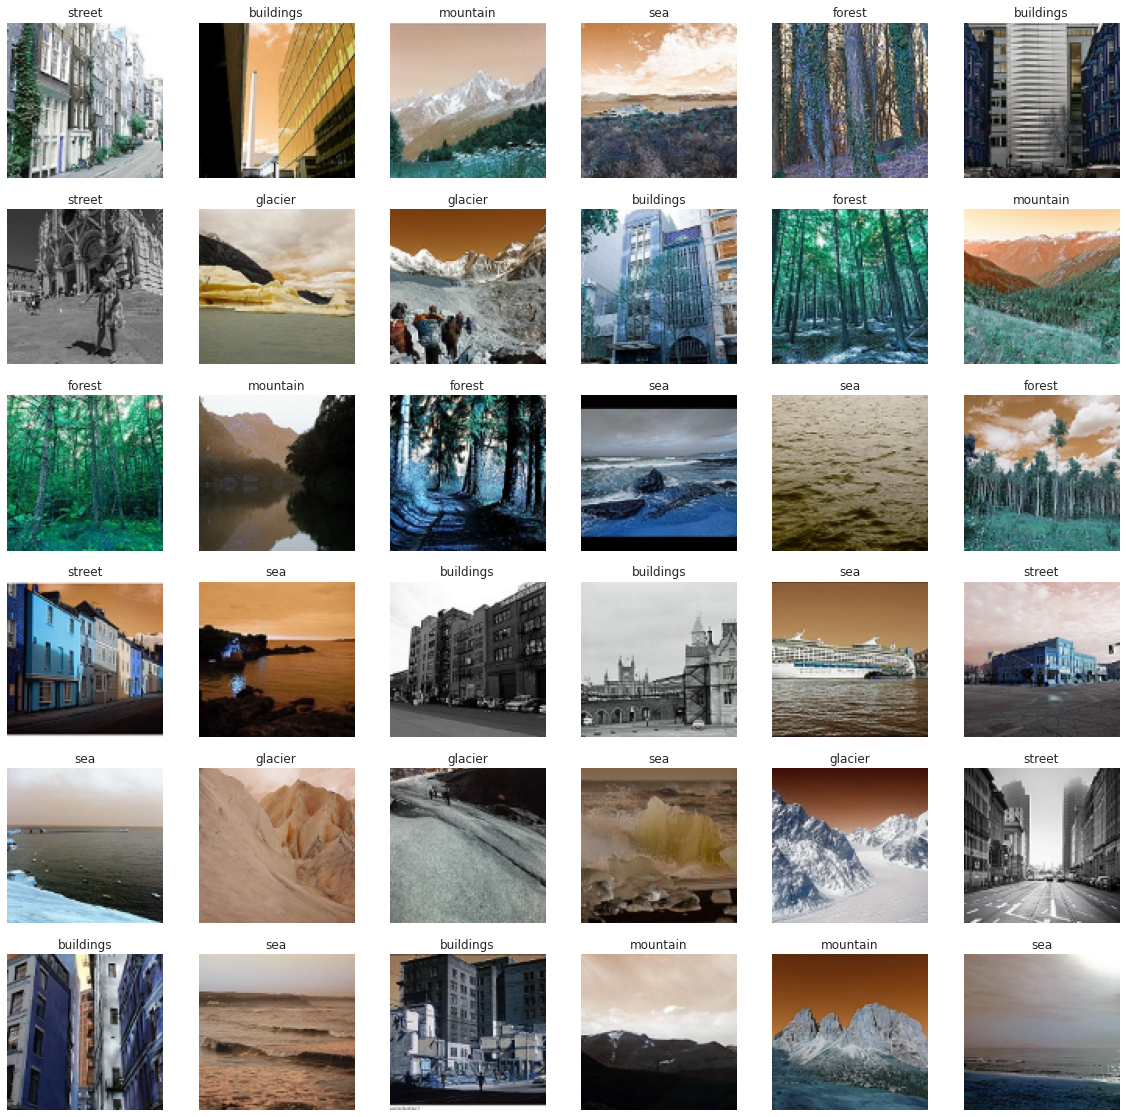

In [11]:
#let's show our images 
plt.figure(figsize=(20,20))
for n , i in enumerate(list (np.random.randint(0,len(X_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:
#Reading TestImage And Resize
size = 100
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [13]:
#how many images in X_test 
print(f'we have {len(X_test)} images in X_test')

we have 3000 images in X_test


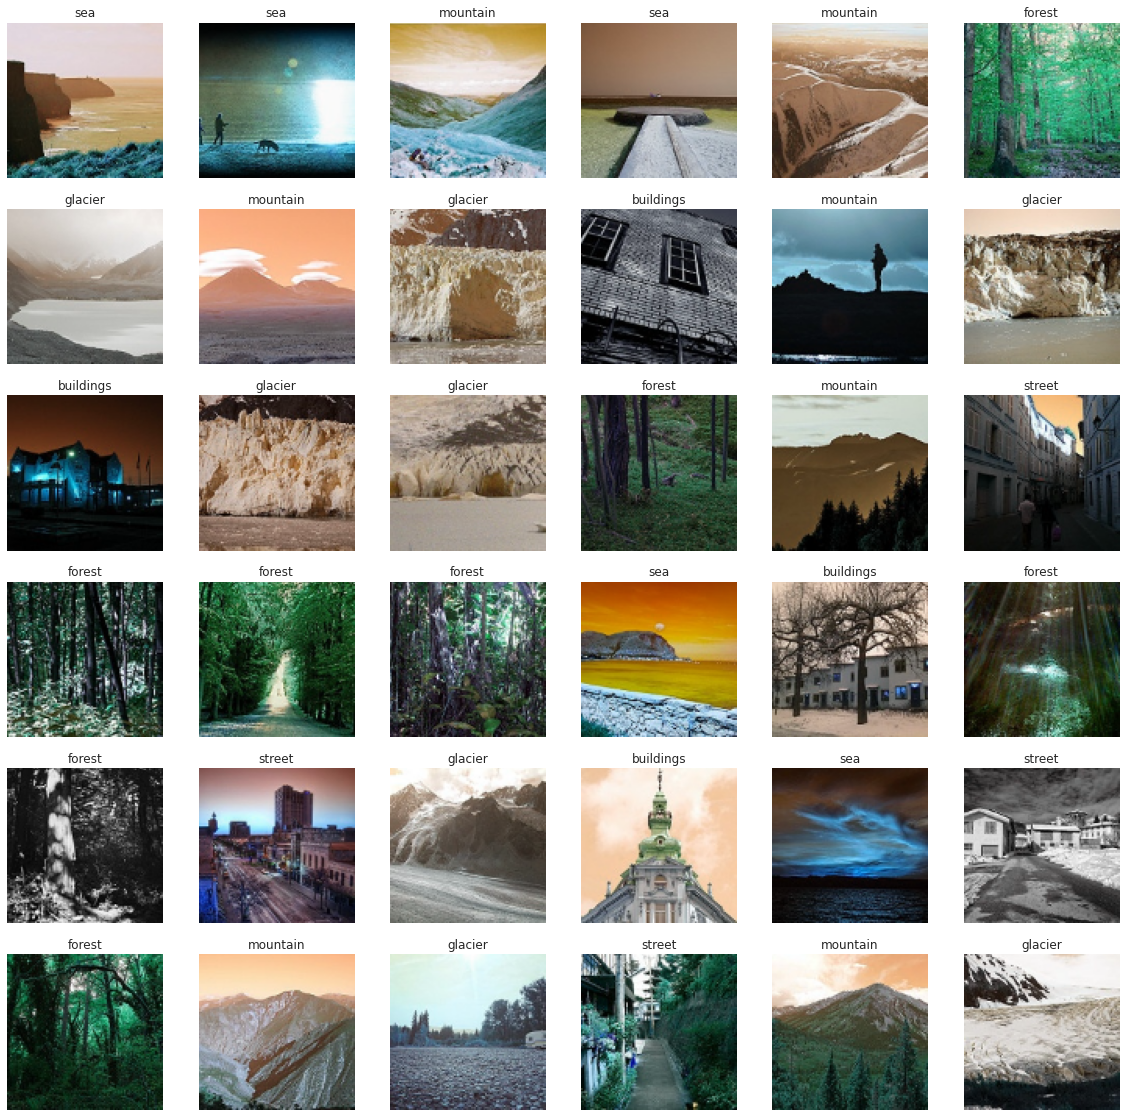

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))


In [15]:
#predict images
X_pred = []
files = gb.glob(pathname= str(predpath+'seg_pred/*.jpg'))
for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image,(size,size))
    X_pred.append(list(image_array))

In [16]:
#how many images in X_test 
print(f'we have {len(X_pred)} images in X_pred')

we have 7301 images in X_pred


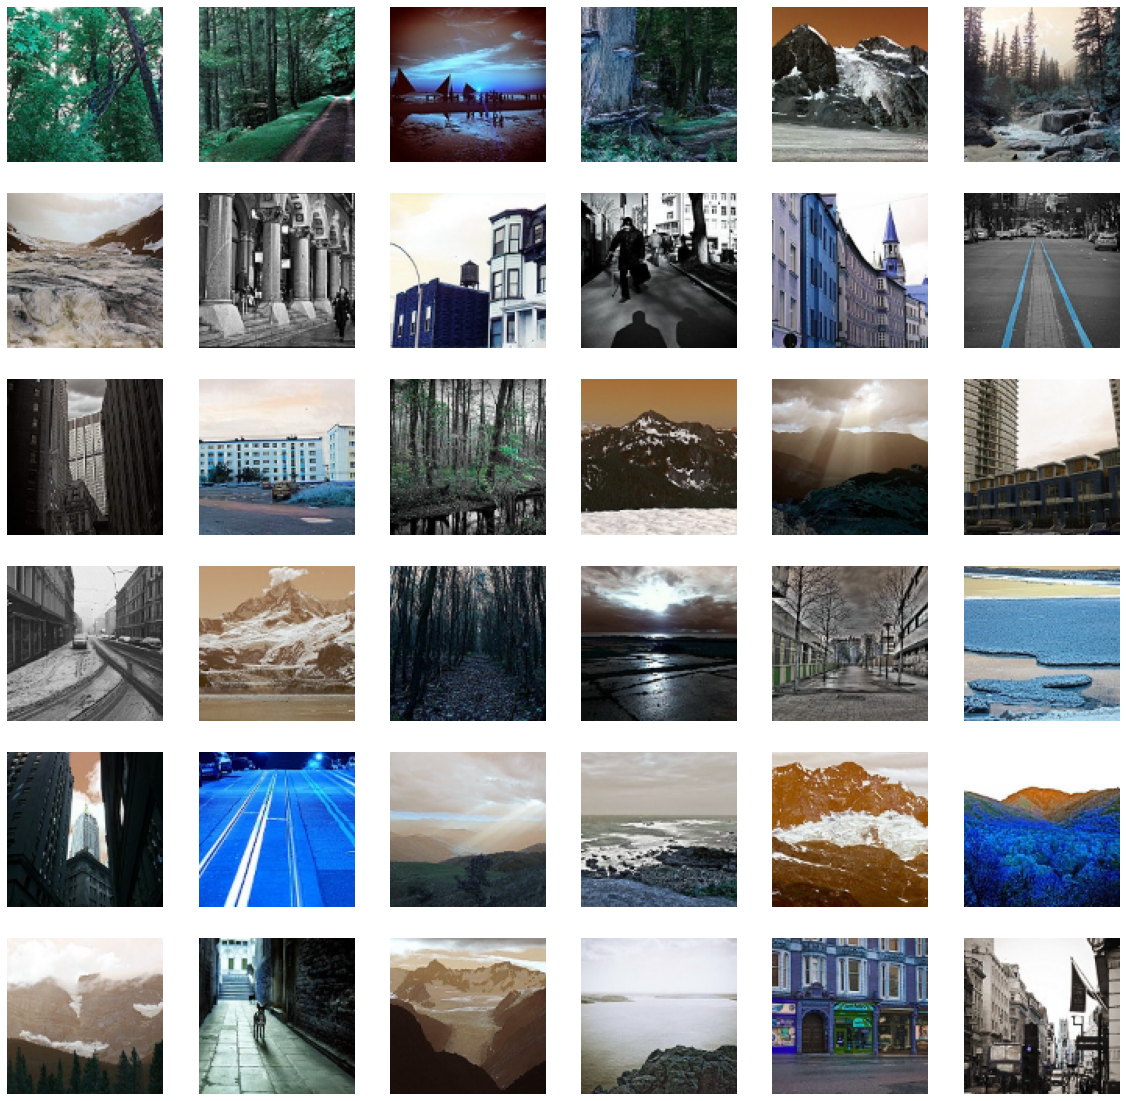

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [18]:
#Building The Model 
#First Convert images to array 
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'X_pred shape is {X_pred_array.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (14034, 100, 100, 3)
X_test shape is (3000, 100, 100, 3)
X_pred shape is (7301, 100, 100, 3)
y_train shape is (14034,)
y_test shape is (3000,)


In [19]:
model = keras.models.Sequential([
    layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(size,size,3)),
    layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(4,4),
    layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(4,4),
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(6,activation='softmax'),
])

2021-12-21 13:50:03.426296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 13:50:03.520355: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 13:50:03.521119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-21 13:50:03.522263: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [22]:
epochs = 50
ThisModel = model.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1) 


2021-12-21 13:50:08.003966: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2021-12-21 13:50:09.379684: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


220/220 [==============================] - 31s 102ms/step - loss: 1.6901 - accuracy: 0.3928
Epoch 2/50
220/220 [==============================] - 22s 99ms/step - loss: 1.1413 - accuracy: 0.5376
Epoch 3/50
220/220 [==============================] - 22s 100ms/step - loss: 1.0260 - accuracy: 0.5970
Epoch 4/50
220/220 [==============================] - 22s 99ms/step - loss: 0.9344 - accuracy: 0.6424
Epoch 5/50
220/220 [==============================] - 22s 99ms/step - loss: 0.8696 - accuracy: 0.6754
Epoch 6/50
220/220 [==============================] - 22s 100ms/step - loss: 0.7862 - accuracy: 0.7185
Epoch 7/50
220/220 [==============================] - 22s 100ms/step - loss: 0.7148 - accuracy: 0.7556
Epoch 8/50
220/220 [==============================] - 22s 100ms/step - loss: 0.6625 - accuracy: 0.7775
Epoch 9/50
220/220 [==============================] - 22s 100ms/step - loss: 0.5953 - accuracy: 0.8029
Epoch 10/50
220/220 [==============================] - 22s 100ms/step - loss: 0.5836 - 

In [23]:
ModelLoss,ModelAccuracy = model.evaluate(X_test,y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

94/94 [==============================] - 3s 22ms/step - loss: 1.6337 - accuracy: 0.8123
Test Loss is 1.633707880973816
Test Accuracy is 0.812333345413208


In [24]:
y_pred = model.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3000, 6)


In [25]:
y_result = model.predict(X_pred_array)

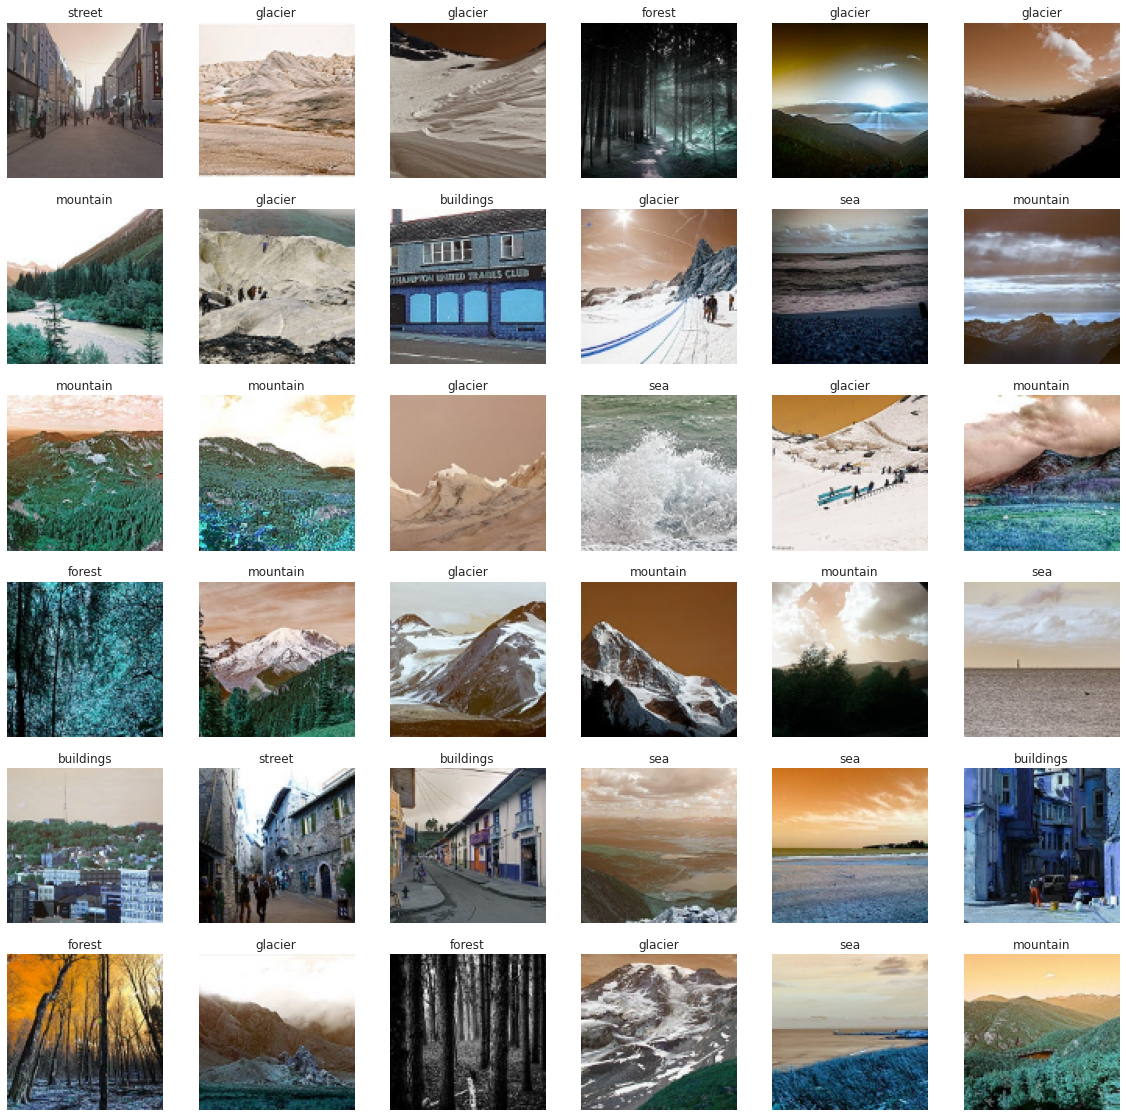

In [26]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))